# Linear Regression Model

## Single Neuron Linear Regression Model
---

<p align="center">
    <img src="regression_neuron.png" width="500">
</p>

---

## Steps to build a Linear Regression model

1. Importing the dataset
2. Data pre-processing
3. Single Neuron Model
4. Splitting the test and train sets
5. Model Training
6. Predicting & Visualizing the test results

## Importing Packages/Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_theme()

## Importing Dataset

Penguins dataset is being used in this Linear Regression Model. 

In [4]:
df = pd.read_csv("penguins.csv")
df[150:]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
150,Adelie,Dream,36.0,17.1,187.0,3700.0,female
151,Adelie,Dream,41.5,18.5,201.0,4000.0,male
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Data pre-processing

I am saving the penguins dataset into pandas dataframe object so that I can easily work on this dataset.
There are total 345 rows and 7 columns.
The columns includes species, island, bill length, bill depth, flipper length, body mass, and sex.
I will focus on species, bill length, and bill depth columns for this model.

The dataset consists of 7 columns.

- species: penguin species (Adelie, Gentoo, and Chinstrap)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe)
- sex: penguin sex

I am dropping all the rows that contain NaN values in this Penguins dataset.

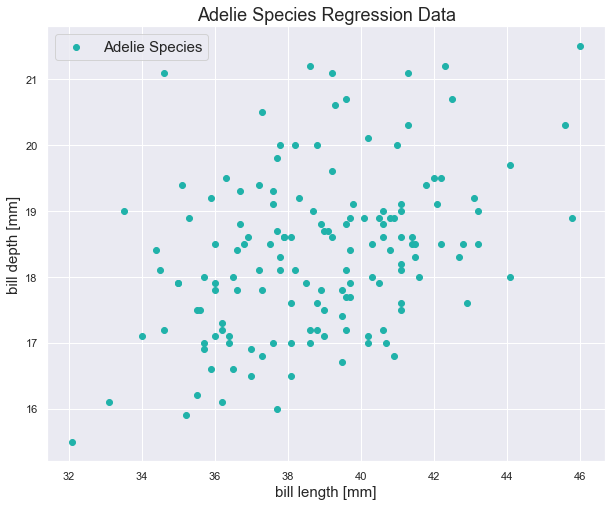

In [3]:
df= df.dropna()
df = df.iloc[:146][["bill_length_mm", "bill_depth_mm"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.bill_length_mm, 
            df.bill_depth_mm, 
            color = "lightseagreen",
            label = "Adelie Species")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Adelie Species Regression Data", fontsize = 18)
plt.show()

## Single Neuron Model

In [118]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


## Splitting the test and train sets

In [4]:
X = df.bill_length_mm.values
X = X.reshape(-1, 1)
y = df.bill_depth_mm.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

## Data Visualization

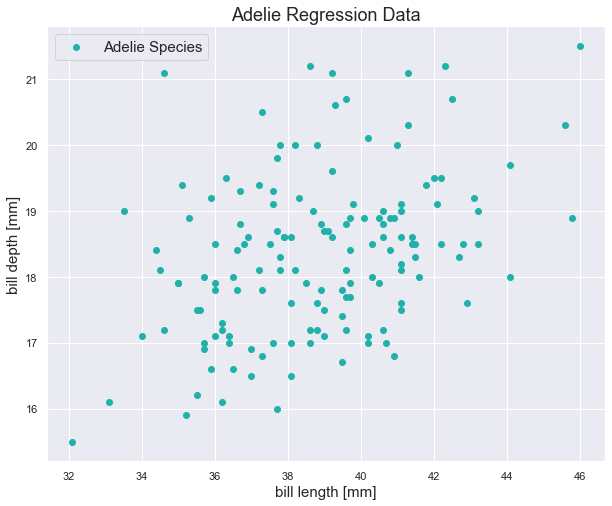

In [5]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie Species")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Adelie Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

## Model Training

In [121]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X_train, y_train, alpha = 0.0001, epochs = 1000)

## Predicting & Visualizing the test results

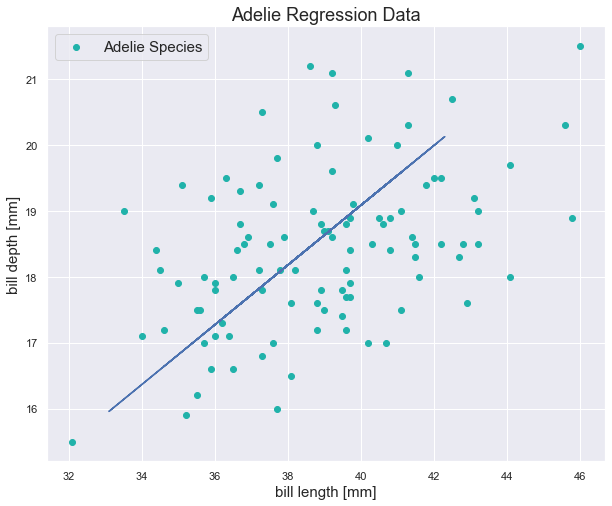

In [123]:
#domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X_train, y_train, color = "lightseagreen", label = "Adelie Species")
plt.plot(X_test,  node.predict(X_test.reshape(-1,1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Adelie Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

## Error Analysis

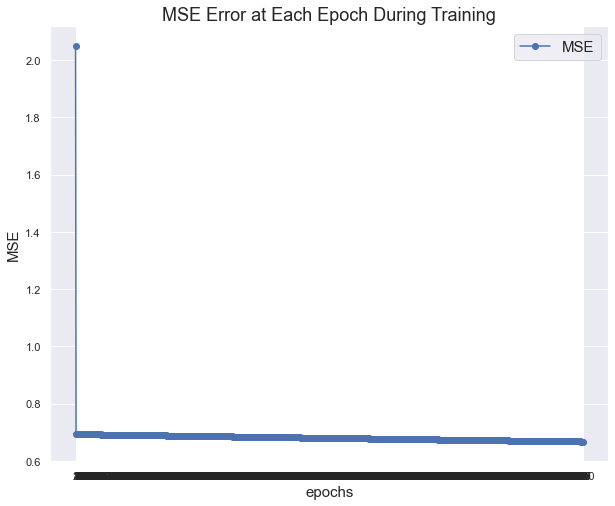

In [124]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

C:\Users\alina\AppData\Local\Temp\ipykernel_14900\1661156879.py:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
C:\Users\alina\AppData\Local\Temp\ipykernel_14900\1661156879.py:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
C:\Users\alina\AppData\Local\Temp\ipykernel_14900\1661156879.py:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
C:\Users\alina\AppData\Local\Temp\ipykernel_14900\1661156879.py:42: RuntimeWarning: overflow encountered in multiply
  self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
C:\Users\alina\AppData\Local\Temp\ipykernel_14900\1661156879.py:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
C:\Users\alina\AppData\Local\Temp\ipykernel_14900\1661156879.py:44: RuntimeWarning: overflow encountered in double_sca

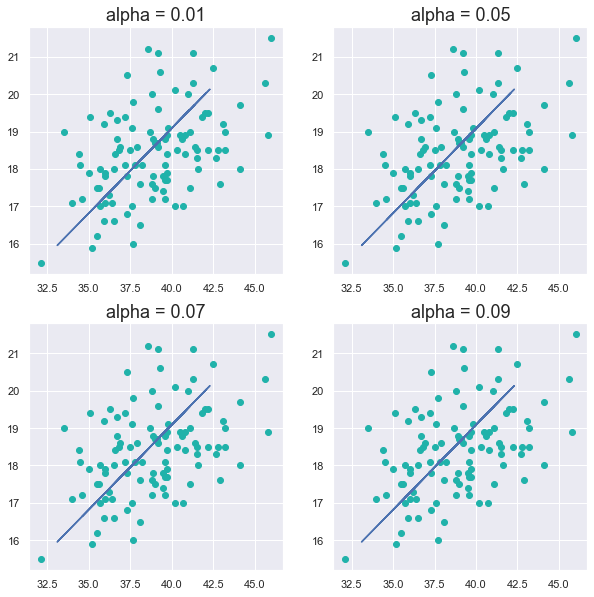

In [125]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

#domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X_train, y_train, alpha = alpha, epochs = 1_000)
    ax.plot(X_test, node.predict(X_test.reshape(-1,1)))
    ax.scatter(X_train, y_train, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

In [6]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [7]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

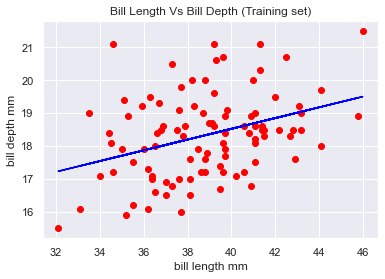

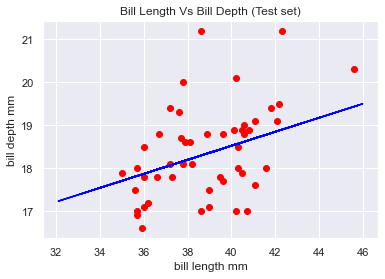

In [8]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Bill Length Vs Bill Depth (Training set)')
viz_train.xlabel('bill length mm')
viz_train.ylabel('bill depth mm')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Bill Length Vs Bill Depth (Test set)')
viz_test.xlabel('bill length mm')
viz_test.ylabel('bill depth mm')
viz_test.show()

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [11]:
y_pred

array([18.70027599, 18.60250395, 18.43955053, 18.61879929, 17.8692136 ,
       18.61879929, 18.89582009, 18.60250395, 17.82032757, 18.06475769,
       18.45584588, 18.08105303, 17.80403223, 17.85291825, 18.06475769,
       18.56991326, 18.14623439, 17.82032757, 18.17882508, 18.29289246,
       18.65138997, 17.8692136 , 18.55361792, 17.82032757, 17.8692136 ,
       18.12993905, 18.16252974, 18.21141576, 18.34177849, 19.43356634,
       17.98328098, 18.2277111 , 18.53732258, 18.35807383, 18.45584588,
       18.56991326, 18.81434338, 17.96698564, 18.55361792, 18.87952474,
       18.7817527 , 18.29289246, 18.70027599, 18.8632294 , 18.35807383,
       18.63509463, 17.90180428, 18.16252974, 17.70626018])